<a href="https://colab.research.google.com/github/saurabhkr78/100-days-ML/blob/main/Hierarchical_Agglomerative_Hierarical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the goal is to identify the distinct group of customers based on their demographic info such as  age,income and spending score.




How it works:
Initialization: Each data point starts as its own cluster.

Pairwise merging: Similar clusters are iteratively merged together based on a chosen distance metric, such as Euclidean distance or Manhattan distance. The choice of distance metric depends on the nature of the data and the problem domain.

Hierarchy formation: As clusters are merged, a hierarchy or dendrogram is formed, which visually represents the relationships between clusters at different levels of similarity.

Stopping criterion: The merging process continues until a stopping criterion is met. This criterion can be based on a predetermined number of clusters, a distance threshold, or another criterion specific to the problem being solved.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [3]:
np.random.seed(42)
#Standard scaler replaces random generated data with actual data

data = pd.DataFrame({'Age':np.random.randint(18,65,100),'Income':np.random.randint(30000,100000,100),'Spending Score':np.random.randint(1,100,100)})

In [4]:
#standardization of dataframe to bring all the data to a scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
#call agglomerative model
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
#affinity-distance matrix between groups linkage-linkage method bewteen groups/cluster it decreases variance
#So,cluster will work as original dataset due to low variance


In [14]:
#fit dataframes
# Fit the model and predict cluster labels
data['cluster'] = model.fit_predict(data_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


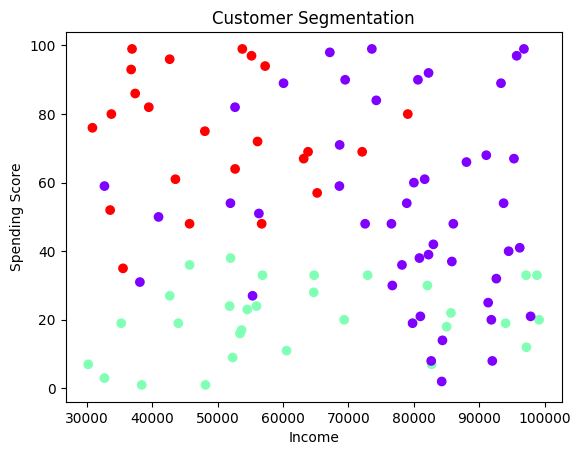

In [16]:
#visualize
plt.scatter(data['Income'],data['Spending Score'],c=data['cluster'],cmap='rainbow')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

In [17]:
#Testing
new_customer= np.array([40,50000,80])
new_customer_scaled = scaler.transform([new_customer])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [19]:
new_customer = pd.DataFrame({'Age':[30],
                             'Income':[50000],
                             'Spending Score':[70]})

In [20]:
scaled_new_customer = scaler.transform(new_customer)
predicted_cluster = model.fit_predict(scaled_new_customer)
print(predicted_cluster)
print(f"the new customer predicted cluster is:{predicted_cluster[0]}")

ValueError: Found array with 1 sample(s) (shape=(1, 3)) while a minimum of 2 is required by AgglomerativeClustering.